<a href="https://colab.research.google.com/github/gkiri/3D-Machine-Learning/blob/master/GermanLicenseplate_DeepLearning_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import IPython.display as ipd
from google.colab import drive 
#drive.mount('/content/drive',force_remount=True)

In [ ]:
#Checking runtime for GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found - Please change Runtime device from CPU to GPU')
print('Found GPU at: {}'.format(device_name))

In [ ]:
pip install googledrivedownloader


# Download DataSet
Load synthetic and Real Datasets locally

In [ ]:
# Real Data
from google_drive_downloader import GoogleDriveDownloader as gdd
#https://drive.google.com/open?id=1-EPZjz9QqT9tA74f_Zaze-O8ZH_58dkM
gdd.download_file_from_google_drive(file_id='1-EPZjz9QqT9tA74f_Zaze-O8ZH_58dkM',
                                    dest_path='./Real_data/real_plates.zip',
                                    unzip=True)

Unzipping...Done.


In [ ]:
# Syn Data
from google_drive_downloader import GoogleDriveDownloader as gdd
#https://drive.google.com/open?id=1wTTrXGVHr6dLmQrymODNZqPL31SYHR81
gdd.download_file_from_google_drive(file_id='1wTTrXGVHr6dLmQrymODNZqPL31SYHR81',
                                    dest_path='./Syn_data/syn_plates.zip',
                                    unzip=True)

Unzipping...Done.


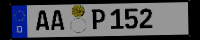

In [ ]:
from IPython.display import display, Image
display(Image(filename='/content/Syn_data/train/AA_P152.png'))

# Parse train and validation dataset

In [ ]:
import glob
import shutil
import os
import pandas as pd

#Real data
files_train = glob.glob("/content/Real_data/train/*")
files_validation = glob.glob("/content/Real_data/validation/*")

#Synthetic Data
syn_files_train = glob.glob("/content/Syn_data/train/*")
syn_files_validation = glob.glob("/content/Syn_data/validation/*")


#Data Augmentation 

> Image transformations

> Motion blur

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
import  random
import cv2

def  motion_blur ( img ):
    '''
    Rank 3 numpy array
    Modified from: https://www.geeksforgeeks.org/opencv-motion-blur-in-python/
    '''
    # Bigger the filter, there is more effect
    # kernel_size = 7
    
    kernels  = [ 3 , 5 ]
    kernel_size  =  random . choice ( kernels )
    if  random . random () >  .5 :
        motion_blur_kernel  =  np . zeros (( kernel_size , kernel_size ))
        motion_blur_kernel [:, int (( kernel_size  -  1 ) /  2 )
                            ] =  np . ones ( kernel_size )
        motion_blur_kernel  =  motion_blur_kernel/kernel_size
    else :
        motion_blur_kernel  =  np . zeros (( kernel_size , kernel_size ))
        motion_blur_kernel [ int (( kernel_size  -  1 ) /  2 ),
                            :] =  np . ones ( kernel_size )
        motion_blur_kernel  =  motion_blur_kernel/kernel_size
    random_mb  =  cv2 . filter2D ( img , - 1 , motion_blur_kernel )
    print(random_mb.reshape)
    return  random_mb

def  pf ( img ):
    if  np . random . rand () >  .5 :
        return  motion_blur ( img )
    else :
        return  img

datagen  =  ImageDataGenerator (
            rescale = 1  /  255. ,
            rotation_range = 10 ,
            width_shift_range = 0.05 ,
            height_shift_range = 0.10 ,
            brightness_range = ( 0.5 , 1.5 ),
            shear_range = 8 ,
            zoom_range = 0.15 ,
            preprocessing_function = pf
        )


In [ ]:
import glob
def augment_each_image(dir):
  for fp in glob.iglob(dir+'/*.png'):
    im=cv2.imread(fp)
    if im.size != (40,200,3):
      img  =  cv2 . resize ( im , dsize = ( 200 , 40 ), interpolation = cv2 . INTER_LINEAR)
    
    img = img.reshape((1, ) + img.shape)


    if '_' not in fp:
      break
    pfx=fp.split('/')[-1].split('_')[0]
    i=0
    for batch in datagen.flow(img, batch_size=16,
                          save_to_dir=dir,
                          save_prefix=pfx,
                          save_format='png'):    
      i += 1    
      if i > 5:        
        break

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Real
augment_each_image('/content/Real_data/train')
augment_each_image('/content/Real_data/validation')

#Synthetic Data
augment_each_image('/content/Syn_data/train')
augment_each_image('/content/Syn_data/validation')


Streaming output truncated to the last 5000 lines.
<built-in method reshape of numpy.ndarray object at 0x7f42a959c440>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c440>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c440>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c5d0>
<built-in method reshape of numpy.ndarray object at 0x7f42a959cf80>
<built-in method reshape of numpy.ndarray object at 0x7f42a959cf80>
<built-in method reshape of numpy.ndarray object at 0x7f42a959cf80>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c440>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c710>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c710>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c1c0>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c1c0>
<built-in method reshape of numpy.ndarray object at 0x7f42a959cb20>
<built-in method reshape of numpy.ndarray object at 0x7f42a959c3f

In [ ]:
#Real data
files_train = glob.glob("/content/Real_data/train/*")
files_validation = glob.glob("/content/Real_data/validation/*")

#Synthetic Data
syn_files_train = glob.glob("/content/Syn_data/train/*")
syn_files_validation = glob.glob("/content/Syn_data/validation/*")

In [ ]:
print("sythetic data train samples=",len(syn_files_train))
print("sythetic validation samples=",len(syn_files_validation))
print("real data train samples=",len(files_train))
print("real validation samples=",len(files_validation))

sythetic data train samples= 62168
sythetic validation samples= 7057
real data train samples= 4333
real validation samples= 70


In [ ]:
d = {'File_Path': [], 'Target_Class': []}
d_val = {'File_Path': [], 'Target_Class': []}
df = pd.DataFrame(data=d)
df_val = pd.DataFrame(data=d_val)
df

,File_Path,Target_Class


#Train data preprocessing

In [ ]:
# Synthetic Data parsing
for i in syn_files_train:
      city_code=i.split('/')[-1].split('_')
      update_len=int(len(city_code[0]))
      if update_len==1 :
        city_code[0] =str(1)+city_code[0] + '_'+ '_'

      elif update_len==2 : 
        city_code[0] =str(2)+city_code[0] + '_'

      elif update_len==3 : 
        city_code[0] =str(3)+city_code[0]
        
      if update_len <1 or update_len > 3:
        print(i)
        continue
      else :
        new_row = {'File_Path':i, 'Target_Class':city_code[0]}

      df = df.append(new_row, ignore_index=True)

df['Target_Class'] = df['Target_Class']   


In [ ]:

print(df.head(15))
print(df.shape)

                                 File_Path Target_Class
0         /content/Syn_data/train/K_J6.png         1K__
1   /content/Syn_data/train/DMR_0_4405.png         3DMR
2    /content/Syn_data/train/LC_0_1849.png         2LC_
3    /content/Syn_data/train/EL_0_7175.png         2EL_
4    /content/Syn_data/train/AÜD_0_171.png         3AÜD
5    /content/Syn_data/train/CZ_0_8035.png         2CZ_
6   /content/Syn_data/train/AOH_0_5851.png         3AOH
7      /content/Syn_data/train/I_0_580.png         1I__
8    /content/Syn_data/train/XÜ_0_9751.png         2XÜ_
9     /content/Syn_data/train/P_0_9580.png         1P__
10   /content/Syn_data/train/JE_0_6453.png         2JE_
11  /content/Syn_data/train/XFE_0_9119.png         3XFE
12  /content/Syn_data/train/SFF_0_9914.png         3SFF
13   /content/Syn_data/train/OQ_0_7609.png         2OQ_
14  /content/Syn_data/train/VHG_0_2679.png         3VHG
(62168, 2)


In [ ]:
# Real Data parsing
for i in files_train:
      city_code=i.split('/')[-1].split('_')
      update_len=int(len(city_code[0]))
      if update_len==1 :
        city_code[0] =str(1)+city_code[0] + '_'+ '_'

      elif update_len==2 : 
        city_code[0] =str(2)+city_code[0] + '_'

      elif update_len==3 : 
        city_code[0] =str(3)+city_code[0]
        
      if update_len <1 or update_len > 3:
        print(i)
        continue
      else :
        new_row = {'File_Path':i, 'Target_Class':city_code[0]}

      df = df.append(new_row, ignore_index=True)

df['Target_Class'] = df['Target_Class']   


/content/Real_data/train/VAM168.png
/content/Real_data/train/VAM168.png_0_6560.png
/content/Real_data/train/MVF3610.png_0_9706.png
/content/Real_data/train/VAM168.png_0_2988.png
/content/Real_data/train/VAM168.png_0_8088.png
/content/Real_data/train/MVF3610.png_0_1294.png
/content/Real_data/train/VAM168.png_0_1508.png
/content/Real_data/train/MVF3610.png_0_4957.png
/content/Real_data/train/VAM168.png_0_8488.png
/content/Real_data/train/MVF3610.png_0_725.png
/content/Real_data/train/VAM168.png_0_8315.png
/content/Real_data/train/MVF3610.png
/content/Real_data/train/MVF3610.png_0_193.png
/content/Real_data/train/MVF3610.png_0_8569.png


In [ ]:
print(df.head(5))
print(df.shape)

                                File_Path Target_Class
0        /content/Syn_data/train/K_J6.png         1K__
1  /content/Syn_data/train/DMR_0_4405.png         3DMR
2   /content/Syn_data/train/LC_0_1849.png         2LC_
3   /content/Syn_data/train/EL_0_7175.png         2EL_
4   /content/Syn_data/train/AÜD_0_171.png         3AÜD
(66487, 2)


In [ ]:
# verify NaNs
df['Target_Class'].isna().sum()

0

In [ ]:
for i in df['Target_Class']:
  if i == 'AGL':
    print(i)
    break

In [ ]:
df.to_csv("merge_real_synth_train.csv")

In [ ]:
df['Target_Class'].value_counts()

1M__    1272
2WÜ_    1007
2MN_    1002
1X__     951
1Q__     909
        ... 
3FDB       1
3STA       1
3KYF       1
3BGL       1
3AIB       1
Name: Target_Class, Length: 3554, dtype: int64

In [ ]:
#Create 3 folers fore ach class
df.head(3)

,File_Path,Target_Class
0,/content/Syn_data/train/K_J6.png,1K__
1,/content/Syn_data/train/DMR_0_4405.png,3DMR
2,/content/Syn_data/train/LC_0_1849.png,2LC_


#Validation data preprocessing

In [ ]:
# Synthetic Data parsing
for i in syn_files_validation:
      city_code=i.split('/')[-1].split('_')
      update_len=int(len(city_code[0]))
      if update_len==1 :
        city_code[0] =str(1)+city_code[0] + '_'+ '_'

      elif update_len==2 : 
        city_code[0] =str(2)+city_code[0] + '_'

      elif update_len==3 : 
        city_code[0] =str(3)+city_code[0]

      if update_len <1 or update_len > 3:
        print(i)
        continue
      else :
        new_row = {'File_Path':i, 'Target_Class':city_code[0]}

      df_val = df_val.append(new_row, ignore_index=True)


In [ ]:
# Real Data parsing
'''for i in files_validation:
    if '_' in i:
      city_code=i.split('/')[-1].split('_')
      update_len=int(len(city_code[0]))
      if update_len==1 :
        city_code[0] =str(1)+city_code[0] + '_'+ '_'

      elif update_len==2 : 
        city_code[0] =str(2)+city_code[0] + '_'

      elif update_len==3 : 
        city_code[0] =str(3)+city_code[0]

      if update_len <1 or update_len > 3:
        print(i)
        continue
      else :
        new_row = {'File_Path':i, 'Target_Class':city_code[0]}
      df_val = df_val.append(new_row, ignore_index=True)'''


"for i in files_validation:\n    if '_' in i:\n      city_code=i.split('/')[-1].split('_')\n      update_len=int(len(city_code[0]))\n      if update_len==1 :\n        city_code[0] =str(1)+city_code[0] + '_'+ '_'\n\n      elif update_len==2 : \n        city_code[0] =str(2)+city_code[0] + '_'\n\n      elif update_len==3 : \n        city_code[0] =str(3)+city_code[0]\n\n      if update_len <1 or update_len > 3:\n        print(i)\n        continue\n      else :\n        new_row = {'File_Path':i, 'Target_Class':city_code[0]}\n      df_val = df_val.append(new_row, ignore_index=True)"

In [ ]:
# verify NaNs
df_val['Target_Class'].isna().sum()

0

In [ ]:
df_val['Target_Class'].value_counts()

1L__    153
1E__    133
1N__    133
1Y__    119
1W__    112
       ... 
2KH_      7
3KNU      7
2HH_      7
3BRE      7
3CSH      7
Name: Target_Class, Length: 600, dtype: int64

In [ ]:
#check data
df_val.head(10)

,File_Path,Target_Class
0,/content/Syn_data/validation/HE_0_9909.png,2HE_
1,/content/Syn_data/validation/MW_0_2392.png,2MW_
2,/content/Syn_data/validation/G_0_8470.png,1G__
3,/content/Syn_data/validation/Q_0_6874.png,1Q__
4,/content/Syn_data/validation/N_0_3458.png,1N__
5,/content/Syn_data/validation/V_0_9366.png,1V__
6,/content/Syn_data/validation/BZT_0_9619.png,3BZT
7,/content/Syn_data/validation/Q_O3061.png,1Q__
8,/content/Syn_data/validation/N_0_7116.png,1N__
9,/content/Syn_data/validation/DX_0_853.png,2DX_


In [ ]:
#df=df+df_val
df = pd.concat([df, df_val], axis=0)


In [ ]:
df.shape

(73544, 2)

#Preprocessing and  CNN architecture

In [ ]:
import os
import cv2
import numpy as np
import string
import time
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional

from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax

from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm import tqdm
from collections import Counter

from PIL import Image

In [ ]:

### get vocab from dataset
import string
vocab =   string . ascii_uppercase  +'Ä'+'Ö'+'Ü'  + '1'+'2'+'3'+ '_'
print(sorted(vocab))

['1', '2', '3', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', 'Ä', 'Ö', 'Ü']


In [ ]:
char_list = sorted(vocab)

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
        
    return dig_lst

In [ ]:
#Sample encoding 
encode_to_labels("HELLO")


[10, 7, 14, 14, 17]

In [ ]:
train_final_paths = df['File_Path'][ : int(len(df) * 0.90)]

train_final_texts = df['Target_Class'][ : int(len(df) * 0.90)]

val_final_paths = df['File_Path'][int(len(df) * 0.90) : ]
val_final_texts = df['Target_Class'][int(len(df) * 0.90) : ]

In [ ]:
len(train_final_paths), len(val_final_paths)


(66189, 7355)

In [ ]:
max_label_len = max([len(str(text)) for text in df['Target_Class'].values])
max_label_len

4

In [ ]:
class My_Generator(Sequence):
    
    def __init__(self, image_filenames, labels, batch_size):
        self.image_filenames, self.labels = image_filenames, labels
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / float(self.batch_size)))

    def __getitem__(self, idx):
        
        batch_paths = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_texts = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        images = []
        training_txt = []
        train_label_length = []
        train_input_length = []

        for im_path, text in zip(batch_paths, batch_texts):
            
            try:
                text = str(text).strip()
                #print(text)
                img = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2GRAY)   

                ### actually returns h, w
                h, w = img.shape

                ### if height less than 40
                if h < 40:
                    add_zeros = np.ones((40-h, w)) * 255
                    img = np.concatenate((img, add_zeros))
                    h = 40

                ## if width less than 200
                if w < 200:
                    add_zeros = np.ones((h, 200-w)) * 255
                    img = np.concatenate((img, add_zeros), axis=1)
                    w = 200

                ### if width is greater than 200 or height greater than 40
                if w > 200 or h > 40:
                    img = cv2.resize(img, (200, 40))

                img = np.expand_dims(img , axis = 2)

                # Normalize each image
                img = img / 255.

                images.append(img)
                training_txt.append(encode_to_labels(text))
                train_label_length.append(len(text))
                train_input_length.append(31)
            except:
                
                pass

        return [np.array(images), 
               pad_sequences(training_txt, maxlen=max_label_len, padding='post', value=len(char_list)), 
               np.array(train_input_length), 
               np.array(train_label_length)], np.zeros(len(images))

In [ ]:
train_final_paths[:1], train_final_texts[:1]


(0    /content/Syn_data/train/K_J6.png
 Name: File_Path, dtype: object, 0    1K__
 Name: Target_Class, dtype: object)

In [ ]:
batch_size = 256
train_generator = My_Generator(train_final_paths, train_final_texts, batch_size)
val_generator = My_Generator(val_final_paths, val_final_texts, batch_size)

In [ ]:
# input with shape of height=32 and width=128 
inputs = Input(shape=(40, 200, 1))

conv_1 = Conv2D(16, (3,3), activation = 'relu', padding='same')(inputs)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
 
conv_2 = Conv2D(32, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)

conv_3 = Conv2D(64, (3,3), activation = 'relu', padding='same')(pool_2)
conv_4 = Conv2D(64, (3,3), activation = 'relu', padding='same')(conv_3)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
 
conv_5 = Conv2D(64, (3,3), activation = 'relu', padding='same')(pool_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(64, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
 
conv_7 = Conv2D(64, (2,2), activation = 'relu')(pool_6)
 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(CuDNNLSTM(128, return_sequences=True))(squeezed)
blstm_2 = Bidirectional(CuDNNLSTM(128, return_sequences=True))(blstm_1)

outputs = Dense(len(char_list) + 1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

In [ ]:
act_model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 40, 200, 1)]      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 200, 16)       160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 100, 16)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 100, 32)       4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 50, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 50, 64)        3692

In [ ]:
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args 
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
loss_out = Lambda(ctc_lambda_func, 
                  output_shape=(1,), 
                  name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [ ]:
file_path = "C_LSTM_best.hdf5"

model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')


checkpoint = ModelCheckpoint(filepath=file_path, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

callbacks_list = [checkpoint]

In [ ]:
epochs = 30

history = model.fit(train_generator, 
                    epochs = epochs,
                    steps_per_epoch = len(train_final_paths) // batch_size,
                    validation_data=val_generator,
                    validation_steps = len(val_final_paths) // batch_size,
                    #verbose = 1,
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/30
258/258 [==============================] - 69s 242ms/step - loss: 14.8051 - val_loss: 12.9069

Epoch 00001: val_loss improved from inf to 12.90695, saving model to C_LSTM_best.hdf5
Epoch 2/30
258/258 [==============================] - 59s 227ms/step - loss: 7.5835 - val_loss: 7.5605

Epoch 00002: val_loss improved from 12.90695 to 7.56051, saving model to C_LSTM_best.hdf5
Epoch 3/30
258/258 [==============================] - 58s 224ms/step - loss: 6.8347 - val_loss: 6.3568

Epoch 00003: val_loss improved from 7.56051 to 6.35678, saving model to C_LSTM_best.hdf5
Epoch 4/30
258/258 [==============================] - 59s 228ms/step - loss: 5.0588 - val_loss: 4.2459

Epoch 00004: val_loss improved from 6.35678 to 4.24593, saving model to C_LSTM_best.hdf5
Epoch 5/30
258/258 [==============================] - 58s 225ms/step - loss: 2.3915 - val_loss: 1.5125

Epoch 00005: val_loss improved from 4.24593 to 1.51249, saving model to C_LSTM_best.hdf5
Epoch 6/30
258/258 [===============

#Evaluation

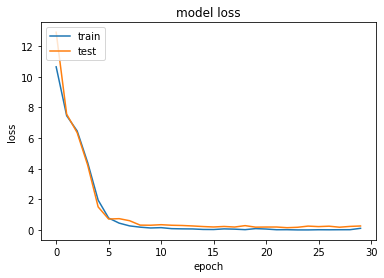

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Testing

In [ ]:
def pre_process_image(path):
    
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    ### actually returns h, w
    h, w = img.shape

    ### if height less than 32
    if h < 40:
        add_zeros = np.ones((40-h, w)) * 255
        img = np.concatenate((img, add_zeros))
        h = 40

    ## if width less than 128
    if w < 200:
        add_zeros = np.ones((h, 200-w)) * 255
        img = np.concatenate((img, add_zeros), axis=1)
        w = 200

    ### if width is greater than 128 or height greater than 32
    if w > 200 or h > 40:
        img = cv2.resize(img, (200, 40))

    
    img = np.expand_dims(img , axis = 2)

    # Normalize each image
    img = img / 255.
    
    return img

In [ ]:
act_model.load_weights('C_LSTM_best.hdf5')


In [ ]:
def predict_output(img):
    # predict outputs on validation images
    prediction = act_model.predict(np.array([img]))
    ## shape (batch_size, num_timesteps, vocab_size)

    # use CTC decoder
    out = K.get_value(K.ctc_decode(prediction, 
                                   input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                                   greedy=True)[0][0])

    ## get the final text    
    for x in out:
        print("predicted city code length = ", end = '')
        print(char_list[int(x[0])])
        print('\n')

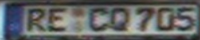



predicted city code length = 2




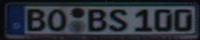



predicted city code length = 2




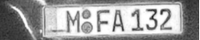



predicted city code length = 1




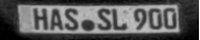



predicted city code length = 3




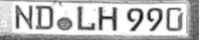



predicted city code length = 2




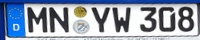



predicted city code length = 2




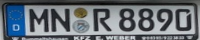



predicted city code length = 2




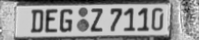



predicted city code length = 3




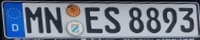



predicted city code length = 2




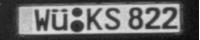



predicted city code length = 2




In [ ]:
import glob

# Testing on validation data of real plates
for fp in glob.iglob(r'/content/Real_data/validation/*'):
    im = Image.open(fp)
    display(im)

    print("\n")
    test_img = pre_process_image(fp)
    predict_output(test_img)

#Inference Section

In [ ]:
import os
import cv2
import numpy as np
import string
import time
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional

from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax

from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm import tqdm
from collections import Counter

from PIL import Image

### get vocab from dataset
import string
vocab =   string . ascii_uppercase  +'Ä'+'Ö'+'Ü'  + '1'+'2'+'3'+ '_'
char_list=sorted(vocab)

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found - PLEASE CHANGE RUNTIME DEVICE FROM CPU TO GPU')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
def pre_process_image(path):    
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    ### actually returns h, w
    h, w = img.shape
    ### if height less than 40
    if h < 40:
        add_zeros = np.ones((40-h, w)) * 255
        img = np.concatenate((img, add_zeros))
        h = 40
    ## if width less than 200
    if w < 200:
        add_zeros = np.ones((h, 200-w)) * 255
        img = np.concatenate((img, add_zeros), axis=1)
        w = 200
    ### if width is greater than 200 or height greater than 40
    if w > 200 or h > 40:
        img = cv2.resize(img, (200, 40))
    img = np.expand_dims(img , axis = 2)
    # Normalize each image
    img = img / 255.  
    return img

In [ ]:
def predict_citycode_len(fp,model):
    # predict outputs on test images
    img=pre_process_image(fp)
    print(img.shape)
    prediction = model.predict(np.array([img]))
    ## shape (batch_size, num_timesteps, vocab_size)
    # use CTC decoder
    out = K.get_value(K.ctc_decode(prediction, 
                                   input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                                   greedy=True)[0][0])
    ## get the final text    
    for x in out:
        print("predicted city code length = ", end = '')
        print(char_list[int(x[0])])
        '''for p in x:
            if int(p) != -1:
                print(char_list[int(p)], end = '')'''        
        print('\n')

In [ ]:
# input with shape of height=32 and width=128 
def get_model():
  inputs = Input(shape=(40, 200, 1))

  conv_1 = Conv2D(16, (3,3), activation = 'relu', padding='same')(inputs)
  pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
  
  conv_2 = Conv2D(32, (3,3), activation = 'relu', padding='same')(pool_1)
  pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)

  conv_3 = Conv2D(64, (3,3), activation = 'relu', padding='same')(pool_2)
  conv_4 = Conv2D(64, (3,3), activation = 'relu', padding='same')(conv_3)
  pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
  
  conv_5 = Conv2D(64, (3,3), activation = 'relu', padding='same')(pool_4)
  # Batch normalization layer
  batch_norm_5 = BatchNormalization()(conv_5)
  
  conv_6 = Conv2D(64, (3,3), activation = 'relu', padding='same')(batch_norm_5)
  batch_norm_6 = BatchNormalization()(conv_6)
  pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
  
  conv_7 = Conv2D(64, (2,2), activation = 'relu')(pool_6)
  
  squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)
  
  # bidirectional LSTM layers with units=128
  blstm_1 = Bidirectional(CuDNNLSTM(128, return_sequences=True))(squeezed)
  blstm_2 = Bidirectional(CuDNNLSTM(128, return_sequences=True))(blstm_1)

  outputs = Dense(len(char_list) + 1, activation = 'softmax')(blstm_2)
  
  return inputs,outputs

# model to be used at test time
inputs,outputs=get_model()
model2 = Model(inputs, outputs)

In [ ]:
#Downloading HDF5 model file
#https://drive.google.com/file/d/1mjY7d3NUwHV_YPC_fAd8RmXrboNSxw7M/view?usp=sharing
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1mjY7d3NUwHV_YPC_fAd8RmXrboNSxw7M',
                                    dest_path='/content/CNN_final.hdf5')
model2.load_weights('/content/CNN_final.hdf5')

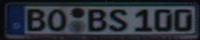

(40, 200, 1)
predicted city code length = 2




In [ ]:
#Inference of single image
fp='/content/Real_data/validation/BO_BS100.png'
im = Image.open(fp)
display(im)
predict_citycode_len(fp,model2)